# Homework 3

The task is to create a search engine on the most read books on [goodreads.com](https://www.goodreads.com/). The dataset is built by taking all the books from the first 300 pages on the most read ranking list. Both the *vocabulary* assigning an id to each word in the corpus, the *inverted and tfidf index* are stored on disk for efficiency purposes and loaded in memory upon creation of a search engine object.

## GoodReads Search Engine

The dataset has been created downloading the first 300 pages of books from the GoodReads.com most read books list, multithreading has been used to speed up the process. Please notice that:
- the code in the cells below assumes the necessary file are all present, if `dataset.tsv` has not been create please run the script `build_dataset.py`.
- if vocabulary or indexes are missing they will be generated upon creation of a SearchEngine object.

In [31]:
%autoreload 2
from functions import *

se = SearchEngine()

### query() function

The functions takes 3 paramenters:
- a string representing the user query
- the type of query, one of `["and", "cosine", "rating", "title"]`
- the number of results to visualize

Default values are AND query and 10 results.

### AND query
This is the basic query that will also serve as the baseline for the other options, the results are the books containing each individual word in the query sorted according to their order in the dataset which corresponds to their order on the GoodReads ranking.

In [22]:
se.query("star wars", type_='and')

,bookTitle,Plot,Url
22531,Anissa's Redemption (The Syrian Virgin #2) by ...,Anissa Toma fled war-torn Syria after narrowly...,https://www.goodreads.com/book/show/24766606-a...
19977,My Boring-Ass Life: The Uncomfortably Candid D...,"Anything but boring, the creator of Jay and Si...",https://www.goodreads.com/book/show/300889.My_...
21514,"Iron Gold (Red Rising Saga, #4) by Pierce Brown","They call him father, liberator, warlord, Reap...",https://www.goodreads.com/book/show/33257757-i...
13848,Outbound Flight by Timothy Zahn,It began as the ultimate voyage of discovery–o...,https://www.goodreads.com/book/show/192523.Out...
8735,"Darken the Stars (Kricket, #3) by Amy A. Bartol",Kyon Ensin finally has what he’s always wanted...,https://www.goodreads.com/book/show/24931971-d...
21540,"The Neverland Wars (The Neverland Wars, #1) by...","Magic can do a lot—give you flight, show you m...",https://www.goodreads.com/book/show/27396942-t...
5669,"Binti (Binti, #1) by Nnedi Okorafor","Her name is Binti, and she is the first of the...",https://www.goodreads.com/book/show/25667918-b...
11307,"Powerless (Supers of Noble's Green, #1) by Mat...",Superheroes soar in this promising debut—and t...,https://www.goodreads.com/book/show/6371720-po...
12333,"Revan (Star Wars: The Old Republic, #1) by Dre...",There’s something out there: a juggernaut of ...,https://www.goodreads.com/book/show/10687840-r...
17456,Permanence by Karl Schroeder,Young Rue Cassels of the Cycler Compact -- a c...,https://www.goodreads.com/book/show/394027.Per...


### Cosine similarity query

Here the results are obtain by sorting the output of an AND query according to the cosine similarity with the user query string. As shown in this example compared with the AND query now a few meaningful titles appear in the top 10.

In [23]:
se.query("star wars", type_='cosine')

,bookTitle,Plot,Url,Similarity
11950,The Star Wars Trilogy by George Lucas,More than twenty-five years after the groundbr...,https://www.goodreads.com/book/show/35434.The_...,0.40
21353,Landfall (The Guardian Herd #3) by Jennifer Ly...,"Perfect for fans of the Warriors, Survivors, a...",https://www.goodreads.com/book/show/25816896-l...,0.32
25957,The Rise of Skywalker by Rae Carson,Witness the epic final chapter of the Skywalke...,https://www.goodreads.com/book/show/52306589-t...,0.25
16804,Star Chosen by Joe Chiappetta,Deleting history was just the beginning. Blast...,https://www.goodreads.com/book/show/8047342-st...,0.22
8154,Veterans of the Psychic Wars by Wayne Gerard T...,THOUGHT IS MORE DANGEROUS THAN YOU THINK...Pre...,https://www.goodreads.com/book/show/10266883-v...,0.18
14176,The Princess Diarist by Carrie Fisher,The last book from beloved Hollywood icon Carr...,https://www.goodreads.com/book/show/26025989-t...,0.18
23249,Mating Net by Rowena Beaumont Cherry,"Prince Devoron-Vitan, supreme commander of the...",https://www.goodreads.com/book/show/2401014.Ma...,0.18
21988,Nerd Do Well by Simon Pegg,The unique life story of one of Britain's most...,https://www.goodreads.com/book/show/9046489-ne...,0.18
12495,The Notebooks of Lazarus Long by Robert A. Hei...,"Too young to fight in the First World War, but...",https://www.goodreads.com/book/show/352.The_No...,0.18
14424,Allegiance by Timothy Zahn,"Never before has the incendiary mix of action,...",https://www.goodreads.com/book/show/35414.Alle...,0.18


### Title query

If we need to be even more specific by looking precisly at books containing the query in their title we can specify such a query and as we see below now all the title reflect the user search.

In [24]:
se.query("star wars", type_='title')

,bookTitle,Plot,Url,Similarity
11950,The Star Wars Trilogy by George Lucas,More than twenty-five years after the groundbr...,https://www.goodreads.com/book/show/35434.The_...,0.43
24691,Free Comic Book Day: Star Wars by Miles Lane,Check out this precursor issue to Revenge of t...,https://www.goodreads.com/book/show/28146402-f...,0.38
8089,"A New Hope (Star Wars: Novelizations, #4) by ...",Luke Skywalker challenged the stormtroopers of...,https://www.goodreads.com/book/show/599090.A_N...,0.35
17240,Star Wars: The Essential Guide to Droids by D...,DIFFERENT KIND OF HEAVY METAL SUPERSTARWhether...,https://www.goodreads.com/book/show/390046.Sta...,0.28
13442,"The Dark Rival (Star Wars: Jedi Apprentice, #2...",Qui-Gon Jinn's past is not at rest. How can he...,https://www.goodreads.com/book/show/359816.The...,0.27
12649,"Annihilation (Star Wars: The Old Republic, #4)...",The Sith Empire is in flux. The Emperor is mis...,https://www.goodreads.com/book/show/13533656-a...,0.27
24677,"Thrawn (Star Wars: Thrawn, #1) by Timothy Zahn",One of the most cunning and ruthless warriors ...,https://www.goodreads.com/book/show/31140332-t...,0.27
9387,"Hard Contact (Star Wars: Republic Commando, #1...","As the Clone Wars rage, victory or defeat lies...",https://www.goodreads.com/book/show/94781.Hard...,0.25
14697,"Rule of Two (Star Wars: Darth Bane, #2) by Dre...",In the New York Times bestseller Darth Bane: P...,https://www.goodreads.com/book/show/1347837.Ru...,0.25
14501,"Rogue Squadron (Star Wars: X-Wing, #1) by Mich...","They are sleek, swift, and deadly. They are th...",https://www.goodreads.com/book/show/513176.Rog...,0.24


### Rating query

One might be interest in the most popular results among fans on a given topic, this query sorts the result of an and query according to the following formula:

`rating score = average rating * cosine similarity`

The similarity of the first result is 1 due normalizing these values.

In [42]:
se.query('happiness', type_='rating')

,bookTitle,Plot,Url,Similarity
4791,Lucky Go Happy: Make Happiness Happen! by Paul...,"Described as ""The best book as far as the atta...",https://www.goodreads.com/book/show/23494381-l...,1.00
18130,Howppiness: Happiness and How to Be Happier by...,Engineers focus on improving and optimizing. S...,https://www.goodreads.com/book/show/21914545-h...,0.84
25660,Happiness in Hard Times by Andrew Matthews,Happiness in Hard Times is about: survivin...,https://www.goodreads.com/book/show/15737855-h...,0.73
25390,The How of Happiness: A Scientific Approach to...,You can change your personal capacity for happ...,https://www.goodreads.com/book/show/2326098.Th...,0.66
23966,Pursuit of Happiness by David G. Myers,Social psychologist David G. Myers has reviewe...,https://www.goodreads.com/book/show/216420.Pur...,0.64
26244,The Secret of Happiness by Billy Graham,"Happiness. It's what we all long for, what all...",https://www.goodreads.com/book/show/2331988.Th...,0.63
22061,Fated by S.H. Kolee,Do you need to love someone to be happy? Does ...,https://www.goodreads.com/book/show/16207330-f...,0.63
11632,Authentic Happiness: Using the New Positive Ps...,"A national bestseller, Authentic Happiness lau...",https://www.goodreads.com/book/show/28012.Auth...,0.56
10652,From Hurt to Happiness: Emotional Rescue from ...,Do you struggle in your relationships? Do your...,https://www.goodreads.com/book/show/17949078-f...,0.52
25204,The Happiness Advantage: The Seven Principles ...,Our most commonly held formula for success is ...,https://www.goodreads.com/book/show/9484114-th...,0.47


### Writers production

The following graph shows the cumulative page count of the first 10 bookseries published which are:

1. C. Auguste Dupin
2. Little Women
3. Palliser
4. Extraordinary Voyages
5. Sir Gibbie
6. Matthew Henry's Commentary
7. Sherlock Holmes
8. Rune Blade
9. Les Quatre Évangiles
10. Oz

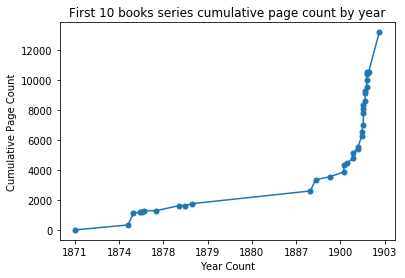

In [51]:
first_series_cumulative_page_count()

## Longest Increasing Subsequence (LIS)

In the following we explore two different solutions for the LIS problem:

- the recursive one does not exploit the solutions to smaller instance by recomputing them at each path in the recursion tree making the overall running time exponential in the worst case
- the dynamic programming on the other hand uses an array to store such partial solutions so that at each step in the computation does not need to recompute them, this reduces the running time to $O(n^2)$

### Recursive implementation

In [81]:
def recursive_LIS_helper(X, i):
    if i == 0:
        return 1
    
    # recursively call only on previous characters that would from an IS
    smaller_precedessors = [j for j in range(i) if X[j] < X[i]]
    
    if len(smaller_precedessors) == 0:
        return 1
    else:
        Y = list(map(lambda j: recursive_LIS_helper(X, j), smaller_precedessors))
        return 1 + max(Y)

def recursive_LIS(X):
    return max(list(map(lambda i: recursive_LIS_helper(X, i), range(len(X)))))

### Running time analysis
Here are the key observations:
- each recursive call of the `recursive_LIS_help()` function makes $O(n)$ operations due to the `filter()` function that finds indices of characters preceding the current one
- in the worst case scenario characters are in alphabetical order and at each recursive call the vector `small_predecessor` contains all the characters but the current one, so we make $n-1$ recursive call of size $1,2, \dots ,n-1$

Let $f(n)$ be the number of nodes in the recursive tree on input $n$, we can write that:

$$f(n) = 1 + \sum_{i=1}^{n-1} f(i)$$

We prove that $f(n) = O\big(2^{n-1}\big)$ by induction on $n$.

The case $n=1$ is trivial. So suppose the claim to be true $\forall k < n$, we have:

$$
\begin{align}
    f(n) &= 1 + \sum_{i=1}^{n-1} f(i)\\
         &= 1 + \sum_{i=1}^{n-1} 2^{i-1}\\
         &= 1 + \sum_{i=0}^{n-2} 2^i\\
         &= 1 + \big(2^{n-1} - 1\big)\\
         &= 2^{n-1}
\end{align}
$$

Since we make $O(n)$ operation at each node, the total running time is clearly exponential.

### Worst case scenario

The main issue with this implementation is that we don't exploit the solution on subsequences but recompute them several times within different branch of the recursive calls. An instance of which the algorithms perform bad is when the characters are sorted which implies a recursive for all `i < n` where `n` is the size of the current instance.


Here's a simple example that would not run in reasonable time.

In [78]:
s = "ABCDEFGHIJKLMNOPQRSTUVZ"
#recursive_LIS(s * 3)

### Dynamic Programming implementation

We can use a simple array to store the results sliding incrementally through the string and using the values previously computed.

In [80]:
def dynamic_LIS(X):
    n = len(X)
    
    if n == 1:
        return 1
    
    V = [1]*n
    
    for i in range(1,n):       
        for j in range(i):
            if X[j] < X[i] and V[j]+1 > V[i]:
                V[i] = V[j] + 1
    
    return max(V)

### Running time analysis

The analysis here is quite trivial:
- the nested `for` runs $O(n^2)$ iteration in total
- the `if` inside the nested `for` takes $O(1)$
- `len()` and `max()` outside the `for` take $O(n)$

so the total running time is $O(n^2)$.

### Correctness of the formula

The proof is by induction on the number of characters $n$.

For $n=1$ we're looking at the first character and so we apply the second formula as there's $j$ to look at, and the value is correctly 1.


Suppose the formula holds for every $k < n$, then by hypothesis $X[j]$ is the length of the LIS of the string $S[1]\dots S[j]$, so if we take the maximum value among the $X[j]$ s.t. $S[j] < S[n]$ and sum 1 we have the length of the LIS of the string $S[1] \dots S[n]$.